 Hasil Permintaan 
Permintaan: 2500

 Hasil Persediaan 
Persediaan: 300

 Hasil Produksi 
Produksi: 4184.47

 Visualisasi Permintaan 


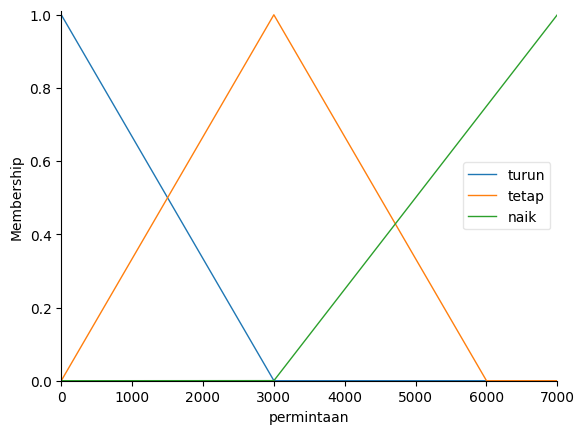


 Visualisasi Persediaan 


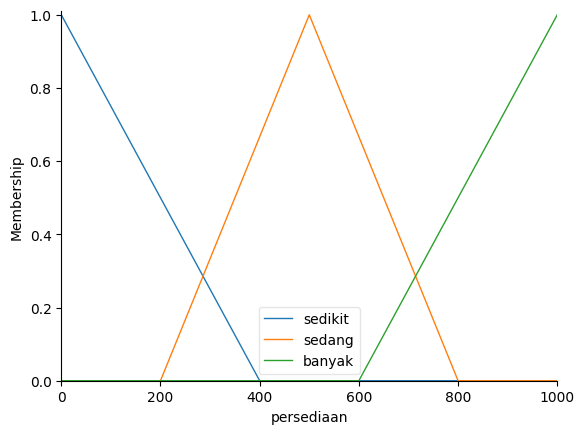


 Visualisasi Produksi 


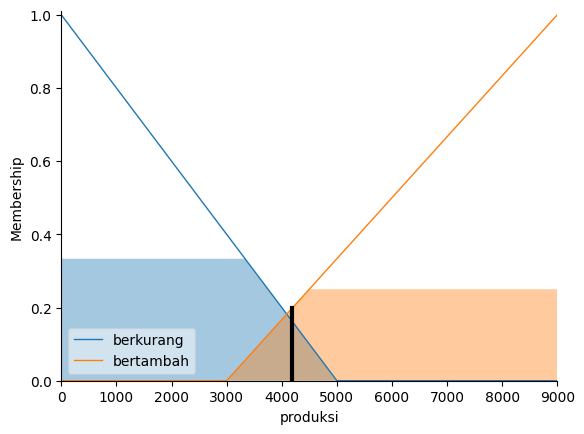

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variabel input: Permintaan dan Persediaan
permintaan = ctrl.Antecedent(np.arange(0, 7001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 1001, 1), 'persediaan')

# Variabel output: Produksi
produksi = ctrl.Consequent(np.arange(0, 9001, 1), 'produksi')

# Definisi fungsi keanggotaan untuk Permintaan
permintaan['turun'] = fuzz.trimf(permintaan.universe, [0, 0, 3000])
permintaan['tetap'] = fuzz.trimf(permintaan.universe, [0, 3000, 6000])
permintaan['naik'] = fuzz.trimf(permintaan.universe, [3000, 7000, 7000])

# Definisi fungsi keanggotaan untuk Persediaan
persediaan['sedikit'] = fuzz.trimf(persediaan.universe, [0, 0, 400])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [200, 500, 800])
persediaan['banyak'] = fuzz.trimf(persediaan.universe, [600, 1000, 1000])

# Definisi fungsi keanggotaan untuk Produksi
produksi['berkurang'] = fuzz.trimf(produksi.universe, [0, 0, 5000])
produksi['bertambah'] = fuzz.trimf(produksi.universe, [3000, 9000, 9000])

# Aturan fuzzy
rule1 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['bertambah'])
rule2 = ctrl.Rule(permintaan['turun'] & persediaan['sedang'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule4 = ctrl.Rule(permintaan['tetap'] & persediaan['sedikit'], produksi['bertambah'])
rule5 = ctrl.Rule(permintaan['tetap'] & persediaan['sedang'], produksi['berkurang'])
rule6 = ctrl.Rule(permintaan['tetap'] & persediaan['banyak'], produksi['berkurang'])
rule7 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])
rule8 = ctrl.Rule(permintaan['naik'] & persediaan['sedang'], produksi['bertambah'])
rule9 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['berkurang'])

# Sistem kontrol fuzzy
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
produksi_simulasi = ctrl.ControlSystemSimulation(produksi_ctrl)

# Input nilai Permintaan dan Persediaan
input_permintaan = 2500  # Gantilah dengan nilai yang Anda inginkan
input_persediaan = 300   # Gantilah dengan nilai yang Anda inginkan

produksi_simulasi.input['permintaan'] = input_permintaan
produksi_simulasi.input['persediaan'] = input_persediaan

# Menjalankan simulasi
produksi_simulasi.compute()

# Menampilkan hasil
print(" Hasil Permintaan ")
print(f"Permintaan: {input_permintaan}")

print("\n Hasil Persediaan ")
print(f"Persediaan: {input_persediaan}")

print("\n Hasil Produksi ")
print(f"Produksi: {produksi_simulasi.output['produksi']:.2f}")

# Visualisasi masing-masing hasil
import matplotlib.pyplot as plt

print("\n Visualisasi Permintaan ")
permintaan.view()
plt.show()

print("\n Visualisasi Persediaan ")
persediaan.view()
plt.show()

print("\n Visualisasi Produksi ")
produksi.view(sim=produksi_simulasi)
plt.show()
